In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

np.random.seed(1)
sns.set_style('darkgrid')

In [72]:
# import the dataset from file
dataset = pd.read_csv("./dataset_v3-difficult.csv")

In [74]:
dataset.head()

,id,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,industry,city,sqm_social_zones,sqm_net_area
0,0,31,6,6,tech,Oslo,77,231
1,1,60,13,17,tech,Bergen,177,448
2,2,35,8,7,tech,Trondheim,90,423
3,3,167,90,40,finance,Oslo,617,2947
4,4,51,28,10,finance,Bergen,145,772


In [75]:
# quick overview of metadata
dataset.describe()

,id,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,sqm_net_area
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,1000.000000,73.186907,86.959520,66.245377,283.769115,1346.761119
std,577.783264,40.334514,2234.956937,2235.161398,2235.842021,856.414023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.000000,44.000000,12.000000,10.000000,120.000000,706.000000
50%,1000.000000,65.000000,23.000000,15.000000,196.000000,1168.000000
75%,1500.000000,91.000000,48.000000,21.000000,296.000000,1750.000000
max,2000.000000,250.000000,100000.000000,100000.000000,100000.000000,4621.000000


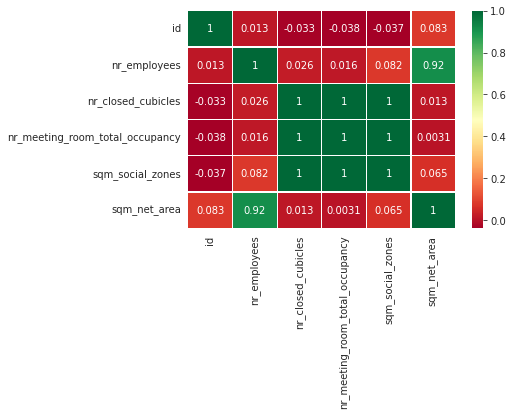

In [76]:
# analyze how well the different parameters correlate before data cleaning
sns.heatmap(dataset.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2)

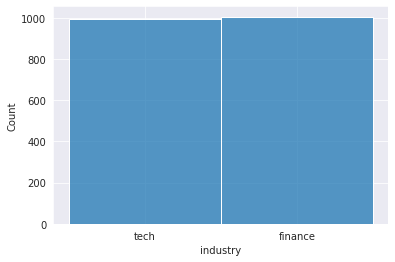

In [77]:
# histogram of the two industries; tech and finance
sns.histplot(data = dataset, x = "industry")

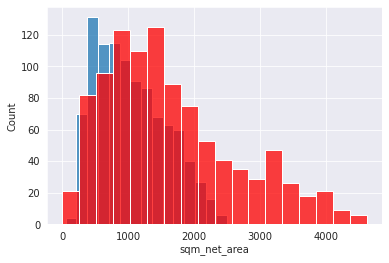

In [78]:
# histogram with regards to industries and total area
sns.histplot(data = dataset[(dataset['industry'] == 'tech')], x = "sqm_net_area")
sns.histplot(data = dataset[(dataset['industry'] == 'finance')], x = "sqm_net_area", color = "red")

In [79]:
dataset['city'].unique()

array(['Oslo', 'Bergen', 'Trondheim'], dtype=object)

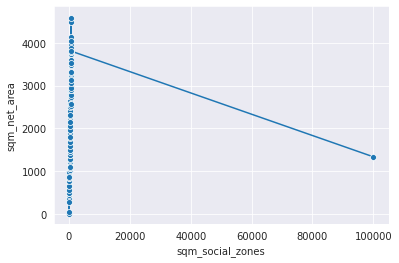

In [80]:
# plot different data to detect obvious outliers, same applies for the next lines of code
sns.lineplot(data = dataset, x = 'sqm_social_zones', y = 'sqm_net_area', marker = 'o')

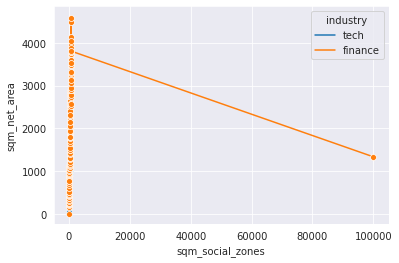

In [81]:
sns.lineplot(data = dataset, x = 'sqm_social_zones', y = 'sqm_net_area', hue = 'industry', marker = 'o')

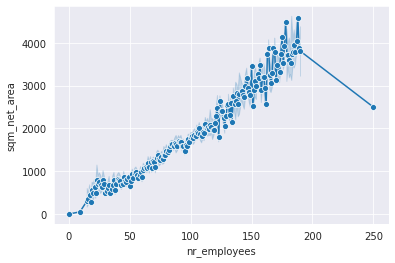

In [82]:
sns.lineplot(data = dataset, x = 'nr_employees', y = 'sqm_net_area', marker = 'o')

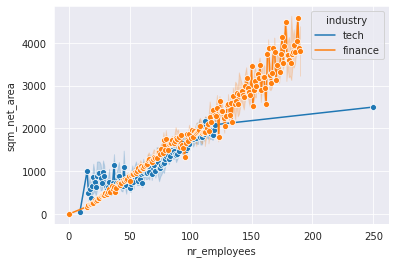

In [83]:
sns.lineplot(data = dataset, x = 'nr_employees', y = 'sqm_net_area', hue = 'industry', marker = 'o')

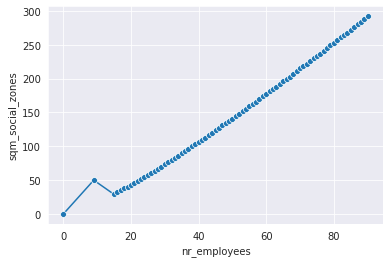

In [84]:
sns.lineplot(data = dataset[(dataset['nr_employees'] <= 90)], x = 'nr_employees', y = 'sqm_social_zones', marker = 'o')

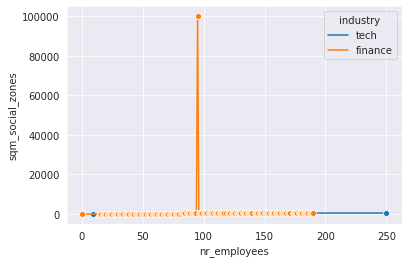

In [85]:
sns.lineplot(data = dataset, x = 'nr_employees', y = 'sqm_social_zones', hue = 'industry', marker = 'o')

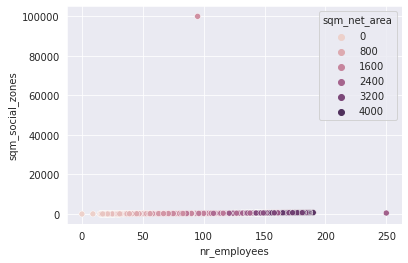

In [86]:
sns.scatterplot(data = dataset, x = 'nr_employees', y = 'sqm_social_zones', hue = 'sqm_net_area', marker = 'o')

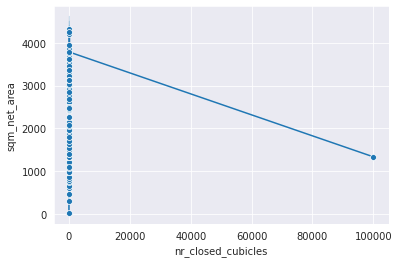

In [87]:
sns.lineplot(data = dataset, x = 'nr_closed_cubicles', y = 'sqm_net_area', marker = 'o')

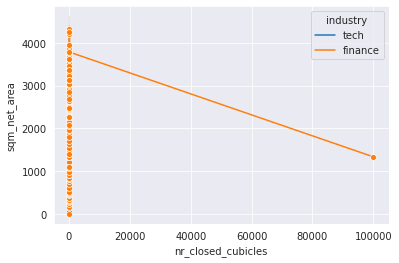

In [88]:
sns.lineplot(data = dataset, x = 'nr_closed_cubicles', y = 'sqm_net_area', hue = 'industry', marker = 'o')

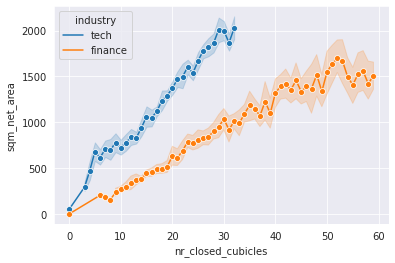

In [89]:
sns.lineplot(data = dataset[(dataset['nr_closed_cubicles'] < 60)], x = 'nr_closed_cubicles', y = 'sqm_net_area', hue = 'industry', marker = 'o')

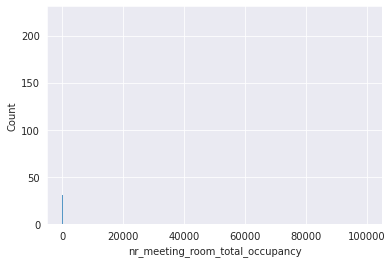

In [90]:
sns.histplot(data = dataset, x = 'nr_meeting_room_total_occupancy')

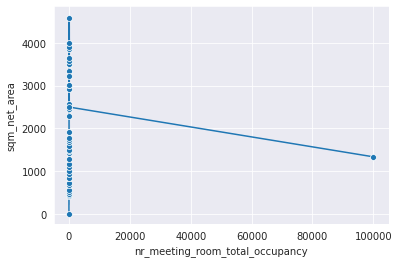

In [91]:
sns.lineplot(data = dataset, x = 'nr_meeting_room_total_occupancy', y = 'sqm_net_area', marker = 'o')

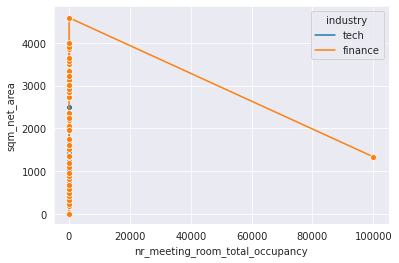

In [92]:
sns.lineplot(data = dataset, x = 'nr_meeting_room_total_occupancy', y = 'sqm_net_area', hue = 'industry', marker = 'o')

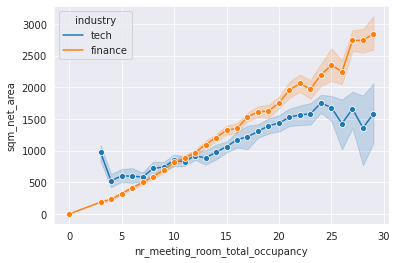

In [93]:
sns.lineplot(data = dataset[(dataset['nr_meeting_room_total_occupancy'] < 30)], x = 'nr_meeting_room_total_occupancy', y = 'sqm_net_area', hue = 'industry', marker = 'o')

In [94]:
# removes 'id' and 'city', as they are not numeric
columns_to_drop = ['id', 'city']

# the new dataset does not include 'id' or 'city'
new_dataset = dataset.drop(columns_to_drop, axis = 1)
new_dataset.head()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,industry,sqm_social_zones,sqm_net_area
0,31,6,6,tech,77,231
1,60,13,17,tech,177,448
2,35,8,7,tech,90,423
3,167,90,40,finance,617,2947
4,51,28,10,finance,145,772


In [95]:
# removing outliers in either direction
new_dataset.drop(new_dataset[(new_dataset['nr_meeting_room_total_occupancy'] > 24)].index, inplace = True)
new_dataset.drop(new_dataset[(new_dataset['nr_meeting_room_total_occupancy'] < 2)].index, inplace = True)
new_dataset['nr_meeting_room_total_occupancy'].describe()

count    1705.000000
mean       13.631085
std         5.492577
min         3.000000
25%         9.000000
50%        13.000000
75%        18.000000
max        24.000000
Name: nr_meeting_room_total_occupancy, dtype: float64

In [96]:
# same here
new_dataset.drop(new_dataset[(new_dataset['nr_closed_cubicles'] > 47)].index, inplace = True)
new_dataset.drop(new_dataset[(new_dataset['nr_closed_cubicles'] < 8)].index, inplace = True)
new_dataset['nr_closed_cubicles'].describe()

count    1229.000000
mean       21.577705
std        10.690258
min         8.000000
25%        13.000000
50%        19.000000
75%        28.000000
max        47.000000
Name: nr_closed_cubicles, dtype: float64

In [194]:
# and here
new_dataset.drop(new_dataset[(new_dataset['sqm_net_area'] > 1500)].index, inplace = True)
new_dataset.drop(new_dataset[(new_dataset['sqm_net_area'] < 460)].index, inplace = True)
new_dataset['sqm_net_area'].describe()

count     796.000000
mean      966.552764
std       271.068551
min       465.000000
25%       742.750000
50%       954.000000
75%      1183.250000
max      1497.000000
Name: sqm_net_area, dtype: float64

In [254]:
# overview after some data cleansing
new_dataset.describe()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,sqm_net_area,industry_numeric
count,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000
mean,58.046482,21.934673,13.374372,171.149497,966.552764,0.582915
std,13.170354,10.883639,3.639483,48.358738,271.068551,0.493387
min,36.000000,8.000000,7.000000,93.000000,465.000000,0.000000
25%,48.000000,13.000000,11.000000,134.000000,742.750000,0.000000
50%,56.000000,19.000000,13.000000,163.000000,954.000000,1.000000
75%,67.000000,30.000000,16.000000,203.000000,1183.250000,1.000000
max,90.000000,47.000000,24.000000,292.000000,1497.000000,1.000000


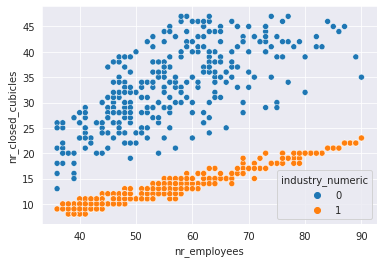

In [241]:
# quick check to see how well different parameters correlate after cleansing
sns.scatterplot(data = new_dataset, x = 'nr_employees', y = 'nr_closed_cubicles', hue = 'industry_numeric', marker = 'o')

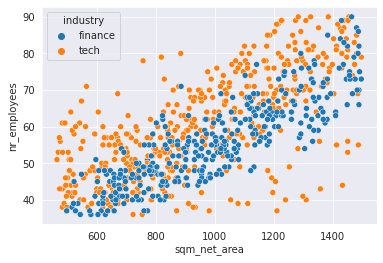

In [197]:
# scatterplot is golden to see individual datapoints
sns.scatterplot(data = new_dataset[new_dataset['nr_employees'] < 1500], x = 'sqm_net_area', y = 'nr_employees', hue = 'industry', marker = 'o')

In [211]:
new_dataset[(new_dataset['sqm_net_area'] < 45)]

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,sqm_net_area,industry_numeric


In [203]:
# turns 'industry' into numerical values; 0 for finance and 1 for tech
new_dataset['industry_numeric'] = pd.Categorical(new_dataset['industry']).codes
new_dataset.head()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,industry,sqm_social_zones,sqm_net_area,industry_numeric
4,51,28,10,finance,145,772,0
10,49,11,9,tech,138,892,1
12,78,19,16,tech,245,1247,1
13,54,12,11,tech,155,878,1
14,90,23,21,tech,292,1385,1


In [253]:
new_dataset.head()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,sqm_net_area,industry_numeric
4,51,28,10,145,772,0
10,49,11,9,138,892,1
12,78,19,16,245,1247,1
13,54,12,11,155,878,1
14,90,23,21,292,1385,1


In [208]:
from sklearn.linear_model import LinearRegression

In [210]:
# splits dataset into training and test set
training_dataset, testing_dataset = train_test_split(new_dataset, test_size = 0.2, shuffle = True)

In [214]:
# removes the label from the training dataset
training_x = training_dataset.drop('sqm_net_area', axis = 1)
training_y = training_dataset['sqm_net_area']
training_x.head()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,industry_numeric
833,37,9,8,96,1
1651,66,36,18,199,0
1637,70,36,19,215,0
546,40,10,12,106,1
403,79,19,17,249,1


In [215]:
# doing the same as above
testing_x = testing_dataset.drop('sqm_net_area', axis = 1)
testing_y = testing_dataset['sqm_net_area']
testing_x.head()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,industry_numeric
444,44,9,9,120,1
505,58,13,20,170,1
1693,42,23,11,113,0
182,38,8,9,100,1
1886,48,22,10,134,0


In [243]:
# training AI with standard linear regression
linreg_model = LinearRegression().fit(training_x, training_y)

In [244]:
# testing how the AI fares
linreg_model.score(testing_x, testing_y)

0.5594163926267002

In [250]:
# training the AI with quadratic features to better fit the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree = 2
polyreg_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_model.fit(training_x, training_y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [252]:
# testing the AI once more
# as we can see the AI fares better with quadratic features
polyreg_model.score(testing_x, testing_y)

0.7275459062757834

In [260]:
# grouping the Dataframe based on industry, and placing them in two different dataframes
grouped = new_dataset.groupby(new_dataset.industry_numeric)
new_dataset_finance = grouped.get_group(0)
new_dataset_tech = grouped.get_group(1)
new_dataset_finance.head()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,sqm_net_area,industry_numeric
4,51,28,10,145,772,0
1026,57,43,14,166,1005,0
1031,49,39,11,138,763,0
1035,65,45,15,196,1149,0
1036,46,30,11,127,693,0


In [263]:
# tech Dataframe
new_dataset_tech.head()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,sqm_net_area,industry_numeric
10,49,11,9,138,892,1
12,78,19,16,245,1247,1
13,54,12,11,155,878,1
14,90,23,21,292,1385,1
18,46,10,11,127,842,1


In [265]:
# splits dataset into training and test set
training_dataset_finance, testing_dataset_finance = train_test_split(new_dataset_finance, test_size = 0.2, shuffle = True)
training_dataset_tech, testing_dataset_tech = train_test_split(new_dataset_tech, test_size = 0.2, shuffle = True)

In [272]:
# removes the label from both Dataframes, both training and testing sets
training_finance_x = training_dataset_finance.drop('sqm_net_area', axis = 1)
training_finance_y = training_dataset_finance['sqm_net_area']
training_tech_x = training_dataset_tech.drop('sqm_net_area', axis = 1)
training_tech_y = training_dataset_tech['sqm_net_area']
testing_finance_x = testing_dataset_finance.drop('sqm_net_area', axis = 1)
testing_finance_y = testing_dataset_finance['sqm_net_area']
testing_tech_x = testing_dataset_tech.drop('sqm_net_area', axis = 1)
testing_tech_y = testing_dataset_tech['sqm_net_area']
# checking to see if everything was split and arranged correctly
training_tech_x.head()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,industry_numeric
311,38,8,7,100,1
402,53,12,9,152,1
687,62,16,19,185,1
386,59,13,12,174,1
180,88,22,19,284,1


In [273]:
# training finance AI with standard linear regression
linreg_model_finance = LinearRegression().fit(training_finance_x, training_finance_y)

In [274]:
# training tech AI with standard linear regression
linreg_model_tech = LinearRegression().fit(training_tech_x, training_tech_y)

In [275]:
# testing how the finance AI fares
linreg_model_finance.score(testing_finance_x, testing_finance_y)

0.723217390526583

In [276]:
# testing how the tech AI fares
linreg_model_tech.score(testing_tech_x, testing_tech_y)

0.7145308662591392

In [277]:
# training the finance AI with quadratic features to better fit the dataset
degree = 2
polyreg_finance_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_finance_model.fit(training_finance_x, training_finance_y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [278]:
# training the tech AI with quadratic features to better fit the dataset
degree = 2
polyreg_tech_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_tech_model.fit(training_tech_x, training_tech_y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [283]:
# testing the finance AI with quadratic regression
polyreg_finance_model.score(testing_finance_x, testing_finance_y)

0.7460854188469067

In [282]:
# testing the tech AI with quadratic regression
polyreg_tech_model.score(testing_tech_x, testing_tech_y)

0.7749702083514347

In [281]:
#QED